In [1]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz
from sklearn.utils.fixes import loguniform

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [ ]:
# cross_validate, cross_val_score(estimator, X, y) : 기본적으로 분류는 StratifiedKFold, 회귀는 KFold
# (parameter) cv : 교차검증 횟수 등 결정(StratifiedKFold... default: 5)
# (parameter) scoring : 검증에 사용할 평가 지표. 기본적으로 분류는 정확도, 회귀는 결정계수
# (parameter) return_train_score : cross_validate에서 train_score도 반환(default: False)
# (parameter) groups : 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정

# KFold, StratifiedKFold
# (parameter) n_splits : 몇 개로 분할할지 결정(default: 5)
# (parameter) shuffle : 무작위로 섞을 지 여부(default: False)

# LeaveOneOut

# ShuffleSplit
# (parameter) train_size : 훈련 세트의 크기. 정수나 0-1 소수 입력 가능
# (parameter) test_size : 테스트 세트의 크기. 정수나 0-1 소수 입력 가능
# (parameter) n_splits : split 반복 횟수

# GroupKFold : cross_val_score에 groups 파라미터를 활용할 때 사용

# RepeatedKFold, RepeatedStratifiedKFold
# (parameter) n_splits
# (parameter) n_repeats : 반복 횟수. 반복할 때마다 데이터를 다시 셔플(default: 5)

# GridSearchCV(estimator, param_grid, ...)
# (parameter) param_grid, cv, return_train_score
# (parameter) scoring : (분류의 경우 average_precision, f1_macro, f1_micro, f1_weighted, roc_auc...)
# (attribution) best_params_
# (attribution) best_score_ : 훈련 세트에서 수행한 교차 검증의 평균 정확도
# (attribution) best_estimator_ : but gridsearch객체가 predict나 score 메서드를 가지므로 딱히 사용 필요 X
# (attribution) cv_results_
# (etc) param_grid는 비대칭 그리드 탐색도 가능(리스트 내 딕셔너리 형태)

# RandomizedSearchCV(estimator, param_distributions, ...)
# (parameter) param_distributions : loguniform함수 등으로 범위 지정(sklearn.utils.fixes.loguniform)

# confusion_matrix(y_test, y_pred)
# (etc) ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels) 함수로 그래프 가능
# (etc) ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels) 함수로 그래프 가능

# f1_score(y_test, y_pred)
# (parameter) average : 다중 분류 시 클래스 평균 목적 사용(macro, micro, weighted... default: binary)
# (etc) classification_report(y_test, y_pred, target_names) 함수로 정밀도, 재현율, f1_score 모두 출력 가능

# precision_recall_curve(y_test, estimator.decision_function(X_test))
# (etc) precision, recall, thresholds의 튜플로 반환

# average_precision_score(y_test, estimator.decision_function(X_test))
# (etc) PrecisionRecallDisplay.from_estimator, from_predctions 함수로 그래프 가능

# roc_curve(y_test, estimator.decision_function(X_test))
# (etc) fp_rate, tp_rate, thresholds의 튜플로 반환
# (etc) roc_auc_score(y_test, estimator.decision_function(X_test)) 함수로 roc_auc_score 반환 가능
# (etc) RocCurveDisplay.from_estimator, from_predictions 함수로 그래프 가능

In [4]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.88

In [6]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [7]:
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=10)
scores, scores.mean()

(array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
        0.93333333, 0.93333333, 1.        , 1.        , 1.        ]),
 0.9733333333333334)

In [8]:
res = cross_validate(logreg, iris['data'], iris['target'], return_train_score=True)
res

{'fit_time': array([0.01601434, 0.02101898, 0.01501393, 0.01601505, 0.01501298]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [9]:
pd.DataFrame(res).mean()

fit_time       0.016615
score_time     0.000000
test_score     0.973333
train_score    0.975000
dtype: float64

In [10]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)

array([0.98, 0.96, 0.96])

In [12]:
kfold = StratifiedKFold(n_splits=3)
cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)

array([0.98, 0.96, 0.98])

In [13]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=loo)

In [14]:
len(scores)

150

In [15]:
ss = StratifiedShuffleSplit(train_size=0.5, test_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=ss)
scores

array([0.97333333, 0.96      , 0.94666667, 0.96      , 0.97333333,
       0.94666667, 0.97333333, 0.90666667, 0.94666667, 0.92      ])

In [16]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, cv=StratifiedGroupKFold(n_splits=3), groups=groups)
scores

array([0.75      , 0.66666667, 0.8       ])

In [17]:
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=rskfold)
scores

array([1.        , 0.96666667, 0.93333333, 1.        , 0.93333333,
       0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667,
       0.93333333, 1.        , 1.        , 0.96666667, 0.96666667,
       0.9       , 1.        , 1.        , 0.93333333, 0.96666667,
       0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667,
       1.        , 0.96666667, 0.96666667, 0.9       , 1.        ,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
       0.96666667, 0.96666667, 1.        , 1.        , 0.9       ,
       0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
       0.9       , 0.96666667, 0.96666667, 1.        , 0.96666667])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [19]:
kind = [0.001, 0.01, 0.1, 1, 10, 100]

In [20]:
param_grid = {'C':kind, 'gamma':kind}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
grid.best_score_, grid.best_params_, grid.score(X_test, y_test)

(0.9731225296442687, {'C': 10, 'gamma': 0.1}, 0.9736842105263158)

In [21]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [22]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results['mean_test_score']).reshape(6, 6)
scores

array([[0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.69644269, 0.90158103, 0.95533597, 0.36640316,
        0.36640316],
       [0.69644269, 0.93794466, 0.96403162, 0.94664032, 0.9284585 ,
        0.50158103],
       [0.93794466, 0.96403162, 0.97312253, 0.94624506, 0.91106719,
        0.58142292],
       [0.96403162, 0.96442688, 0.95494071, 0.94624506, 0.91106719,
        0.58142292]])

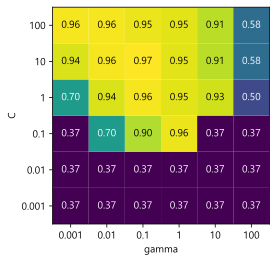

In [23]:
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                      xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')

In [24]:
param_grid = [{'kernel':['rbf'], 'C':kind, 'gamma':kind}, {'kernel':['linear'], 'C':kind}]

In [25]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
grid.best_score_, grid.best_params_, grid.score(X_test, y_test)

(0.9731225296442687,
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 0.9736842105263158)

In [26]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000601,4.904465e-04,0.000600,0.000490,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000801,4.003525e-04,0.000400,0.000490,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000801,4.004002e-04,0.000400,0.000490,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000601,4.904075e-04,0.000400,0.000490,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000601,4.903296e-04,0.000400,0.000490,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.000801,4.004002e-04,0.000400,0.000490,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.000601,4.904075e-04,0.000400,0.000490,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000801,4.004241e-04,0.000200,0.000401,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.000601,4.904075e-04,0.000400,0.000490,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.000601,4.903686e-04,0.000400,0.000490,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [27]:
param_dist = [{'kernel':['rbf'], 'C':loguniform(0.001, 100), 'gamma':loguniform(0.001, 100)}, {'kernel':['linear'], 'C':loguniform(0.001, 100)}]

In [28]:
rand = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=100, return_train_score=True).fit(X_train, y_train)
rand.best_score_, rand.best_params_, rand.score(X_test, y_test)

(0.9818181818181818,
 {'C': 1.679483440088268, 'kernel': 'linear'},
 0.9736842105263158)

In [29]:
digits = load_digits()
y = digits['target'] == 9
X_train, X_test, y_train, y_test = train_test_split(digits['data'], y, random_state=0)

In [30]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8955555555555555

In [31]:
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
forest.score(X_test, y_test)
pred_forest = forest.predict(X_test)

In [32]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9844444444444445

In [33]:
pred_logreg = logreg.predict(X_test)

In [34]:
confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

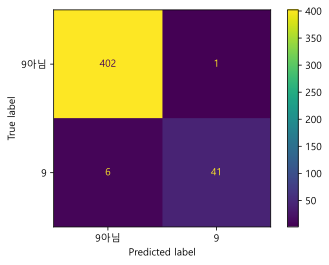

In [35]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['9아님', '9'])

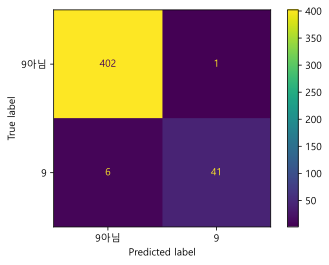

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=['9아님', '9'])

In [37]:
f1_score(y_test, pred_logreg), f1_score(y_test, pred_forest)

(0.9213483146067415, 0.8395061728395062)

In [38]:
print(classification_report(y_test, pred_logreg, target_names=['9아님', '9'], zero_division=0))

              precision    recall  f1-score   support

         9아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [39]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
svc = SVC(gamma=0.05).fit(X_train, y_train)

In [41]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [42]:
y_pred_lower = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_lower))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [43]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, random_state=0)

In [44]:
svc = SVC(gamma=0.05).fit(X_train2, y_train2)
y_pred_lower = svc.decision_function(X_val) > -0.8
print(classification_report(y_val, y_pred_lower))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        76
           1       0.64      0.78      0.70         9

    accuracy                           0.93        85
   macro avg       0.80      0.86      0.83        85
weighted avg       0.94      0.93      0.93        85



In [45]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
precision, recall, thresholds

(array([0.32142857, 0.2962963 , 0.30769231, 0.32      , 0.33333333,
        0.34782609, 0.36363636, 0.38095238, 0.4       , 0.36842105,
        0.38888889, 0.35294118, 0.375     , 0.4       , 0.42857143,
        0.46153846, 0.41666667, 0.45454545, 0.4       , 0.44444444,
        0.5       , 0.57142857, 0.66666667, 0.8       , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([1.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.77777778,
        0.77777778, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.55555556, 0.55555556, 0.44444444, 0.44444444,
        0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
        0.33333333, 0.22222222, 0.11111111, 0.        ]),
 array([-0.61017442, -0.55520859, -0.44541916, -0.41910817, -0.40638832,
        -0.38484153, -0.36614926, -0.35210245, -0.34711954, -0.259532  ,
         0.01037887,  0.07136595,  0.27986527,  0.36778024

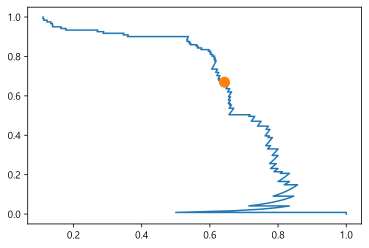

In [46]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(abs(thresholds))
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10)
plt.show()

In [47]:
thresholds

array([-1.42644669, -1.41801331, -1.41416031, ...,  1.44315499,
        1.44543522,  1.4675732 ])

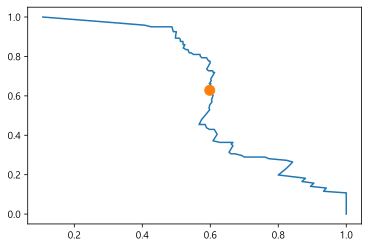

In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2).fit(X_train, y_train)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
close_default_rf = np.argmin(abs(thresholds_rf - 0.5))
plt.plot(precision_rf, recall_rf)
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], 'o', markersize=10)

In [49]:
f1_score(y_test, rf.predict(X_test)), f1_score(y_test, svc.predict(X_test))

(0.6097560975609757, 0.6558704453441295)

In [50]:
average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])

0.659559370099291

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

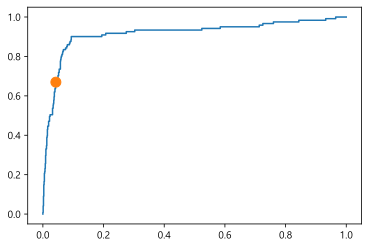

In [54]:
close_zero = np.argmin(abs(thresholds))
plt.plot(fpr, tpr)
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10)

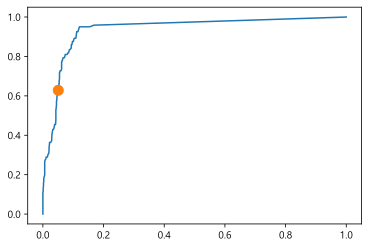

In [57]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
close_zero_rf = np.argmin(abs(thresholds_rf - 0.5))
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_rf[close_zero_rf], tpr_rf[close_zero_rf], 'o', markersize=10)

In [59]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, svc.decision_function(X_test))

(0.9366953672911659, 0.9162935036712654)

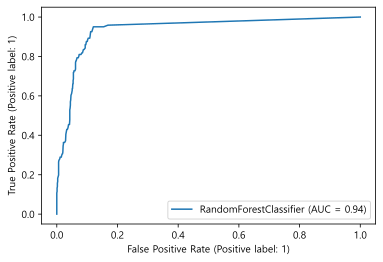

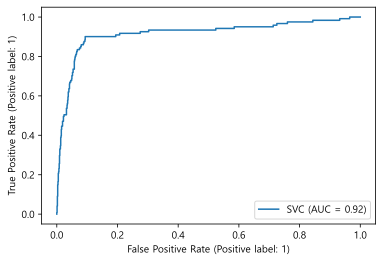

In [62]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name='SVC')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)

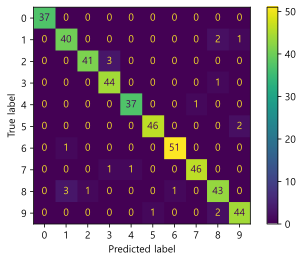

In [66]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [67]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [69]:
f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='micro')

(0.9542564253775861, 0.9533333333333334)

In [70]:
cross_val_score(SVC(), digits['data'], digits['target'] == 9, cv=5)

array([0.975     , 0.99166667, 1.        , 0.99442897, 0.98050139])

In [71]:
cross_val_score(SVC(), digits['data'], digits['target'] == 9, scoring='roc_auc', cv=5)

array([0.99717078, 0.99854252, 1.        , 0.999828  , 0.98400413])

In [74]:
cross_validate(SVC(), digits['data'], digits['target'] == 9, scoring=['roc_auc', 'recall_macro'], cv=5, return_train_score=True)

{'fit_time': array([0.01377153, 0.01401162, 0.01501369, 0.01501441, 0.01401234]),
 'score_time': array([0.01501322, 0.01401258, 0.01601505, 0.01601505, 0.01301122]),
 'test_roc_auc': array([0.99717078, 0.99854252, 1.        , 0.999828  , 0.98400413]),
 'train_roc_auc': array([0.99867878, 0.99914067, 0.99897497, 0.9988247 , 0.99991413]),
 'test_recall_macro': array([0.88734568, 0.95833333, 1.        , 0.97222222, 0.90277778]),
 'train_recall_macro': array([0.97222222, 0.98225219, 0.97878027, 0.98225249, 0.98572471])}

In [75]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'] == 9, random_state=0)

In [85]:
param_grid = {'gamma':[0.0001, 0.01, 1]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3).fit(X_train, y_train)
(grid.best_score_, grid.best_params_, accuracy_score(y_test, grid.predict(X_test)),
average_precision_score(y_test, grid.decision_function(X_test)))

(0.971789161098738, {'gamma': 0.0001}, 0.9733333333333334, 0.9656749529729884)

In [86]:
param_grid = {'gamma':[0.0001, 0.01, 1]}
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='average_precision', cv=3).fit(X_train, y_train)
(grid.best_score_, grid.best_params_, accuracy_score(y_test, grid.predict(X_test)),
average_precision_score(y_test, grid.decision_function(X_test)))

(0.9848054272142445, {'gamma': 0.01}, 0.8955555555555555, 0.9958247456096899)